In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/Metadata_Country_API_1_DS2_en_csv_v2_6011403.csv')

In [3]:
df.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  265 non-null    object 
 1   Region        217 non-null    object 
 2   IncomeGroup   216 non-null    object 
 3   SpecialNotes  127 non-null    object 
 4   TableName     265 non-null    object 
 5   Unnamed: 5    0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 12.5+ KB


In [5]:
df.shape

(265, 6)

In [6]:
df.size

1590

In [7]:
df.ndim

2

In [8]:
df.dtypes

Country Code     object
Region           object
IncomeGroup      object
SpecialNotes     object
TableName        object
Unnamed: 5      float64
dtype: object

In [9]:
df.describe(include=[np.object])

<ipython-input-9-554b7518cb2b>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=[np.object])


,Country Code,Region,IncomeGroup,SpecialNotes,TableName
count,265,217,216,127,265
unique,265,7,4,112,265
top,ABW,Europe & Central Asia,High income,The reporting period for national accounts dat...,Aruba
freq,1,58,82,7,1


In [10]:
df=df.drop(columns=['Unnamed: 5'])

In [11]:
df.columns

Index(['Country Code', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName'], dtype='object')

In [12]:
df.nunique()

Country Code    265
Region            7
IncomeGroup       4
SpecialNotes    112
TableName       265
dtype: int64

In [13]:
df.Region.value_counts()

Europe & Central Asia         58
Sub-Saharan Africa            48
Latin America & Caribbean     42
East Asia & Pacific           37
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64

In [14]:
df.IncomeGroup.value_counts()

High income            82
Lower middle income    54
Upper middle income    54
Low income             26
Name: IncomeGroup, dtype: int64

In [15]:
df.max()

<ipython-input-15-4c1ddf8920ff>:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.max()


Country Code         ZWE
TableName       Zimbabwe
dtype: object

In [16]:
df.min()

<ipython-input-16-c3612c624a3f>:1: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.min()


Country Code            ABW
TableName       Afghanistan
dtype: object

In [17]:
df.isnull().sum()

Country Code      0
Region           48
IncomeGroup      49
SpecialNotes    138
TableName         0
dtype: int64

In [18]:
df.dropna(axis=0,inplace=True)


In [19]:
df=df.drop(columns=['SpecialNotes'])

In [20]:
df

,Country Code,Region,IncomeGroup,TableName
2,AFG,South Asia,Low income,Afghanistan
4,AGO,Sub-Saharan Africa,Lower middle income,Angola
9,ARG,Latin America & Caribbean,Upper middle income,Argentina
13,AUS,East Asia & Pacific,High income,Australia
14,AUT,Europe & Central Asia,High income,Austria
...,...,...,...,...
259,WSM,East Asia & Pacific,Lower middle income,Samoa
261,YEM,Middle East & North Africa,Low income,"Yemen, Rep."
262,ZAF,Sub-Saharan Africa,Upper middle income,South Africa
263,ZMB,Sub-Saharan Africa,Lower middle income,Zambia


In [21]:
group_Income=df.groupby(['IncomeGroup']).value_counts().to_frame().reset_index()

In [22]:
group_Income.value_counts()

IncomeGroup          Country Code  Region                     TableName     0
High income          AUS           East Asia & Pacific        Australia     1    1
Lower middle income  SWZ           Sub-Saharan Africa         Eswatini      1    1
                     PAK           South Asia                 Pakistan      1    1
                     NPL           South Asia                 Nepal         1    1
                     NIC           Latin America & Caribbean  Nicaragua     1    1
                                                                                ..
High income          ROU           Europe & Central Asia      Romania       1    1
                     PRT           Europe & Central Asia      Portugal      1    1
                     PRI           Latin America & Caribbean  Puerto Rico   1    1
                     NZL           East Asia & Pacific        New Zealand   1    1
Upper middle income  ZAF           Sub-Saharan Africa         South Africa  1    1
Length: 9

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt


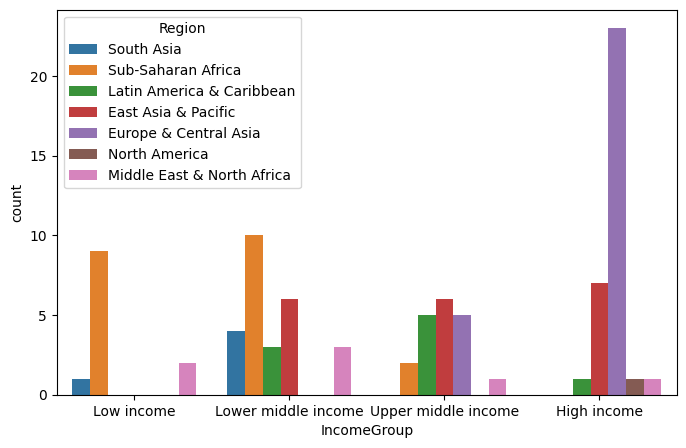

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='IncomeGroup',hue='Region')
plt.show()

In [25]:
df.groupby('Country Code')['IncomeGroup'].value_counts()

Country Code  IncomeGroup        
AFG           Low income             1
AGO           Lower middle income    1
ARG           Upper middle income    1
AUS           High income            1
AUT           High income            1
                                    ..
WSM           Lower middle income    1
YEM           Low income             1
ZAF           Upper middle income    1
ZMB           Lower middle income    1
ZWE           Lower middle income    1
Name: IncomeGroup, Length: 90, dtype: int64

([<matplotlib.patches.Wedge at 0x78716ef28580>,
 [Text(0.5368923387526869, 1.2058800174928974, 'High income'),
  Text(-1.3167845381051035, -0.09207866314912216, 'Upper middle income'),
  Text(0.09207872479225498, -1.3167845337945887, 'Lower middle income'),
  Text(1.2058800928941178, -0.5368921693987293, 'Low income')],
 [Text(0.2928503665923747, 0.6577527368143076, '36.7%'),
  Text(-0.7182461116936928, -0.05022472535406663, '28.9%'),
  Text(0.050224758977593625, -0.7182461093425029, '21.1%'),
  Text(0.6577527779422461, -0.29285027421748866, '13.3%')])

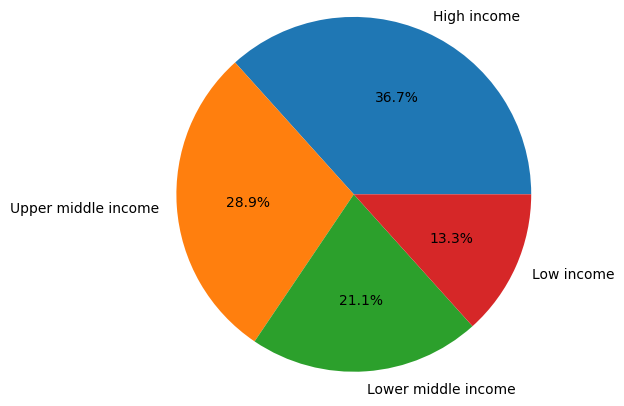

In [26]:
plt.pie(df.IncomeGroup.value_counts(),autopct='%.1f%%',radius=1.2,labels=['High income','Upper middle income','Lower middle income','Low income'])
